In [158]:
import numpy as np
import pandas as pd

from time import time

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn import metrics

# For splitting dataset
from sklearn.cross_validation import train_test_split

# k-fold cross validation
from sklearn.cross_validation import KFold, cross_val_score

# Import sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [159]:
all_data = pd.read_csv("input/breast-cancer-wisconsin-data/data.csv")

In [160]:
all_data = all_data.drop(['id', 'Unnamed: 32'], axis = 1)
target = all_data['diagnosis']
features = all_data.drop('diagnosis', axis = 1)
all_features = list(features.columns[0:11])
features.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [161]:
target.unique()

array(['M', 'B'], dtype=object)

In [162]:
target = target.map({'M':1,'B':0})
target.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [163]:
features.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean           ...             \
count     569.000000              569.000000           ...              
mean        0.181162                0.062798           ...              
std         0.027414                0.007060           ...              
min         0.106000                0.049960           ...              
25%         0.161900                0.057700           ...              
50%         0.179200                0.061540           ...              
75%         0.195700                0.066120           ...              
max         0.304000                0.097440           ...              

       radius_worst  texture_worst  perimeter_worst   area_worst  \
count    569.000000     569.000000       569.000000   569.000000   
mean      16.269190      25.677223       107.261213   880.583128   
std        4.833242       6.146258        33.602542   569.356993   
min        7.930000      12.020000        50.410000   185.200000   
25%       13.010000      21.080000        84.110000   515.300000   
50%       14.970000      25.410000        97.660000   686.500000   
75%       18.790000      29.720000       125.400000  1084.000000   
max       36.040000      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 30 columns]

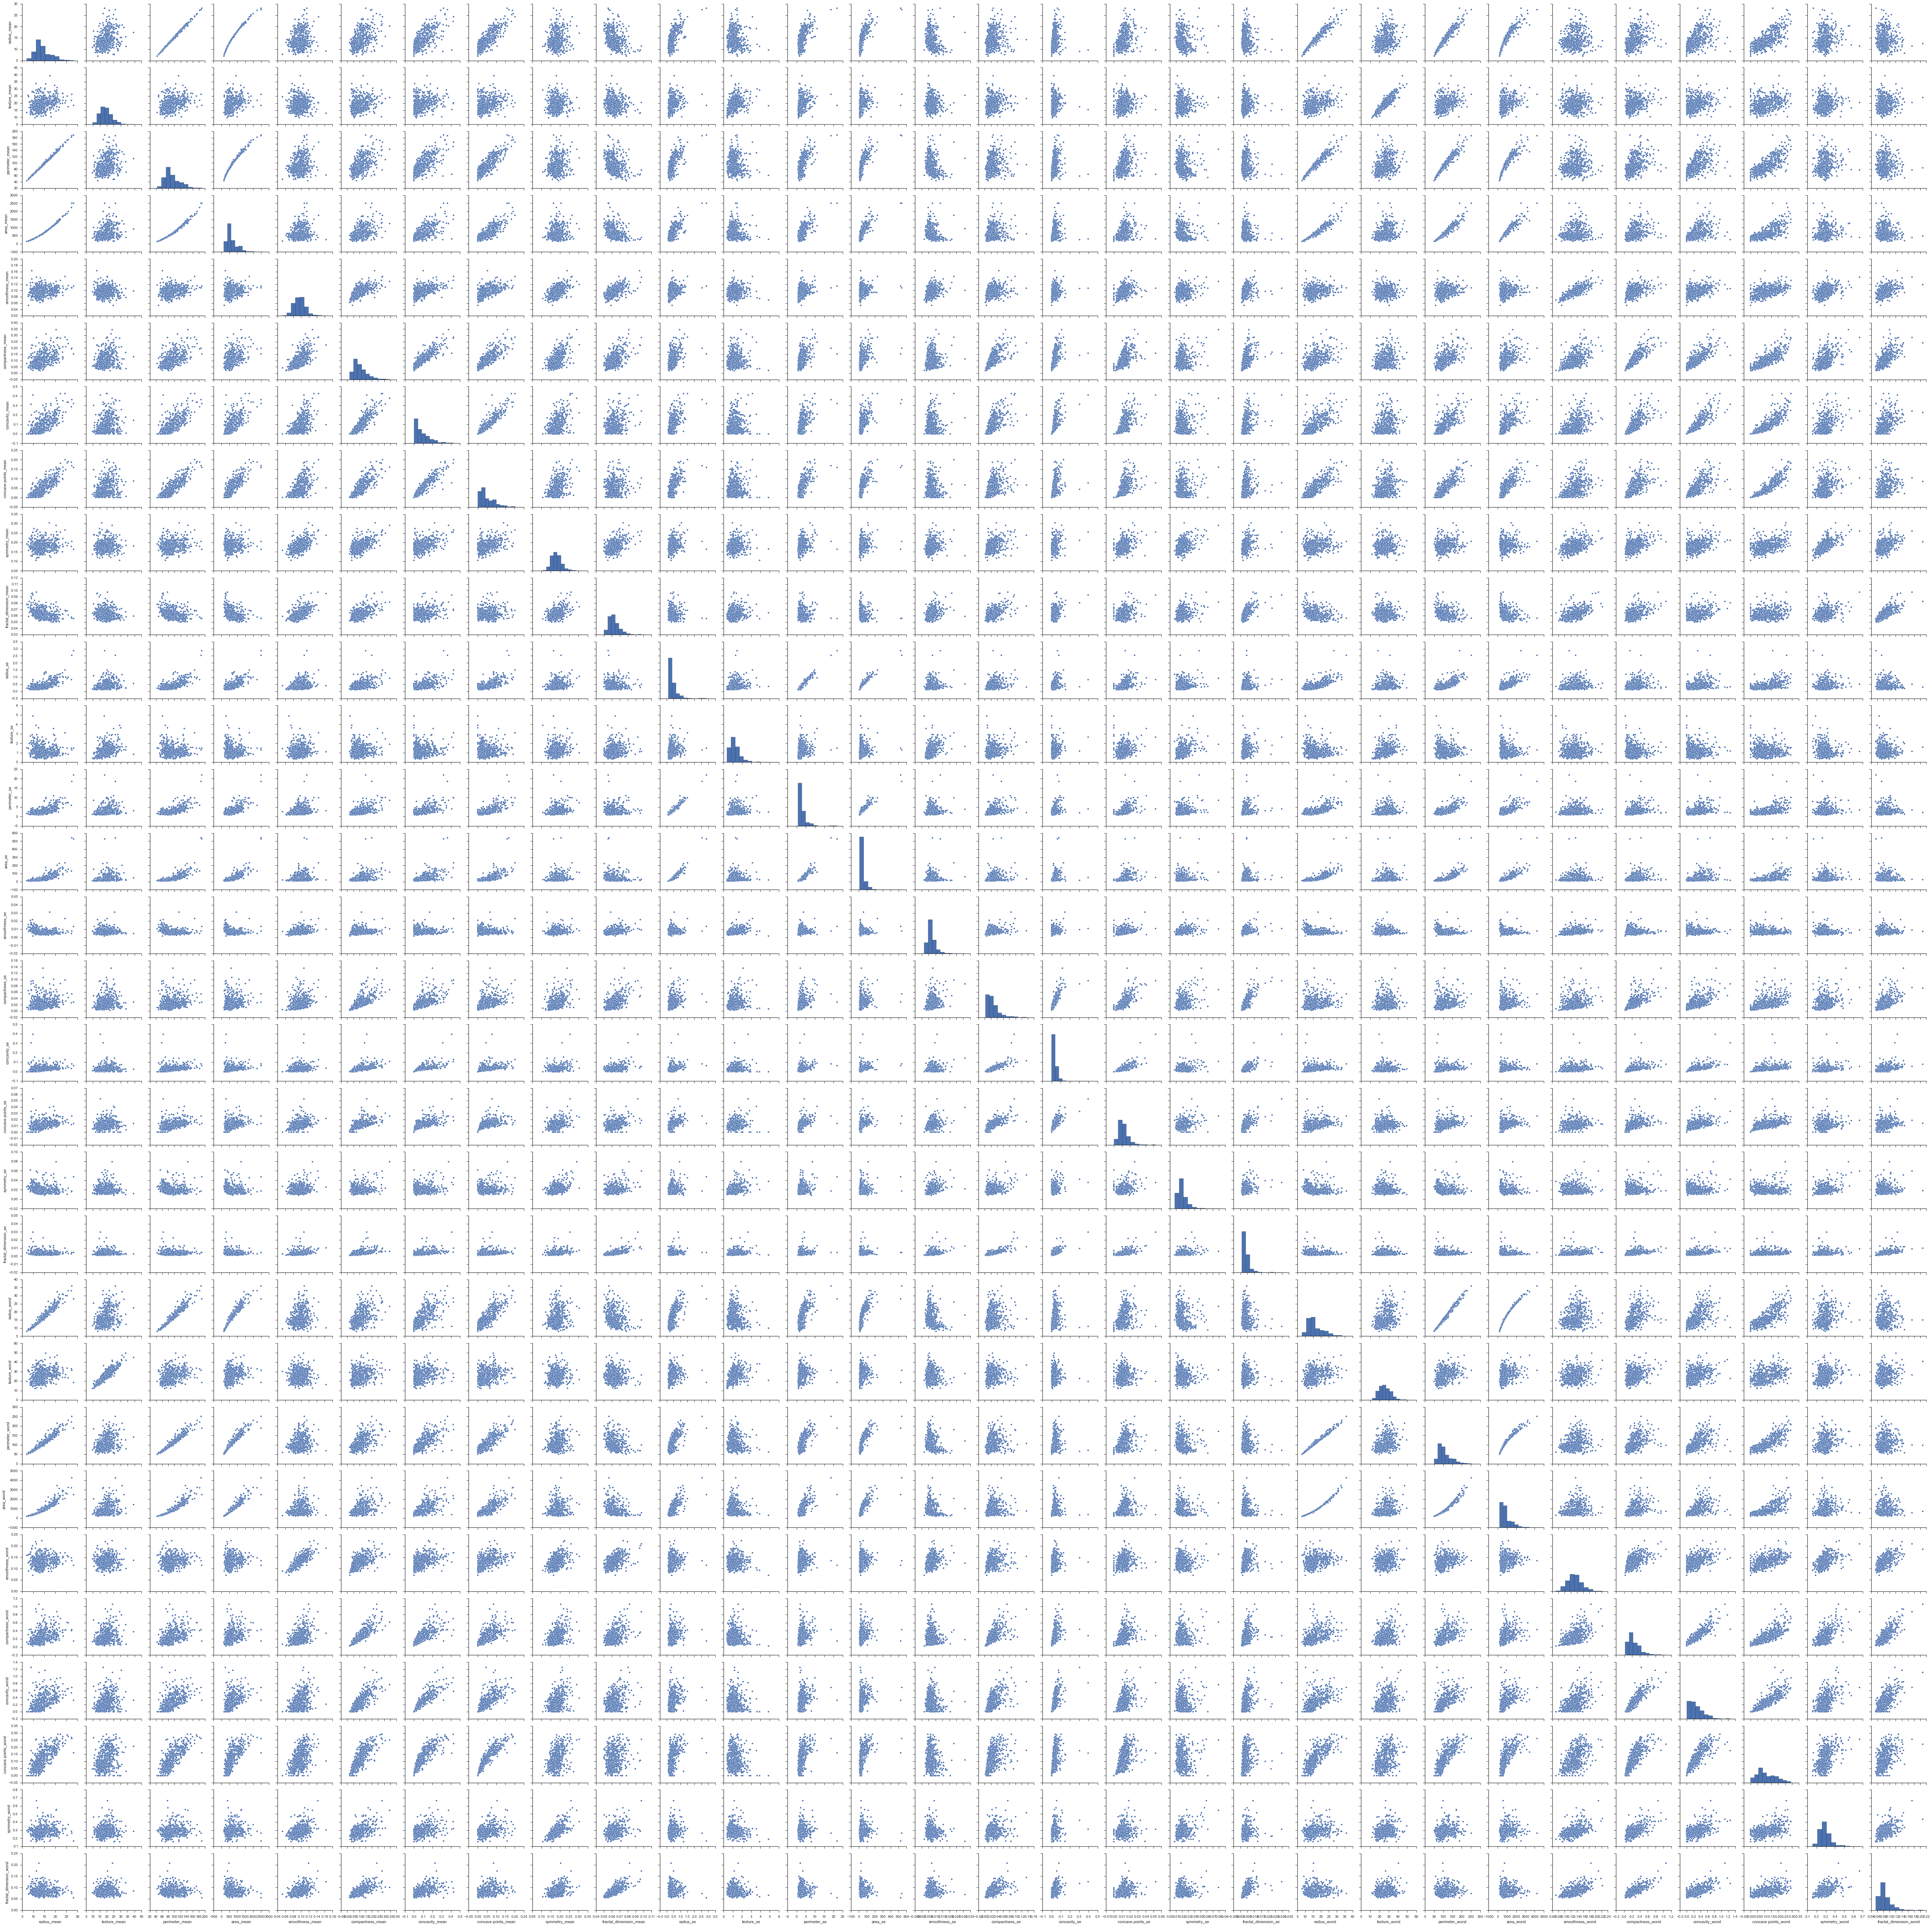

In [154]:
g = sns.pairplot(all_data)

In [164]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= .3,random_state=0)

In [165]:
Kfold = KFold(len(all_data),n_folds = 10,shuffle = False)

In [177]:
def train_and_predict_model(model, model_name, X_train, X_test, y_train, y_test, selected_cols):
    t0 = time()
    model.fit(X_train[selected_cols], y_train)
    train_time = time() - t0
    
    t1 = time()
    pred = model.predict(X_test[selected_cols])
    predict_time = time() - t1
    
    score = f1_score(y_test, pred)
    
    print "f1_score of {} is {}".format(model_name, score)
    print "Accuracy of {} is {}".format(model_name, metrics.accuracy_score(y_test, pred))
    print "cross_val_score of {} is {}".format(model_name, cross_val_score(model, features[selected_cols], target , cv = 10).mean())
    
    print "Time taken to train {} is {}".format(model_name, train_time)
    print "Time taken to predict {} is {}".format(model_name, predict_time)

In [178]:
DTree = DecisionTreeClassifier()
train_and_predict_model(DTree, 'Decision Tree', X_train, X_test, y_train, y_test, all_features)

f1_score of Decision Tree is 0.873015873016
Accuracy of Decision Tree is 0.906432748538
cross_val_score of Decision Tree is 0.917624881168
Time taken to train Decision Tree is 0.00600004196167
Time taken to predict Decision Tree is 0.0019998550415


In [179]:
dt = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression()
rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
sv = SVC(kernel='linear',C=1)
boost = AdaBoostClassifier()

In [180]:
for clf, name in [(dt, 'DecisionTree'),
                  (lr, 'Logistic'),
                  (rfc, 'Random Forest'),
                  (sv, 'Support Vector Classification'),
                  (boost, 'AdaBoost Classifier')]:
    print "---------------------------------------------------------------------"
    train_and_predict_model(clf, name, X_train, X_test, y_train, y_test, all_features)
    

---------------------------------------------------------------------
f1_score of DecisionTree is 0.90625
Accuracy of DecisionTree is 0.929824561404
cross_val_score of DecisionTree is 0.912544291764
Time taken to train DecisionTree is 0.00500011444092
Time taken to predict DecisionTree is 0.000999927520752
---------------------------------------------------------------------
f1_score of Logistic is 0.878048780488
Accuracy of Logistic is 0.912280701754
cross_val_score of Logistic is 0.907065076484
Time taken to train Logistic is 0.00500011444092
Time taken to predict Logistic is 0.00200009346008
---------------------------------------------------------------------
f1_score of Random Forest is 0.897637795276
Accuracy of Random Forest is 0.923976608187
cross_val_score of Random Forest is 0.933384106819
Time taken to train Random Forest is 0.0179998874664
Time taken to predict Random Forest is 0.00600004196167
---------------------------------------------------------------------
f1_score o

In [ ]:
# Use GridSearch to tune the model
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    from sklearn.cross_validation import ShuffleSplit
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.svm import SVC
    from sklearn import linear_model
    
    
    regressor1 = DecisionTreeRegressor()
    regressor2 = SVC()
    regressor3 = linear_model.SGDRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    tree_params = {'max_depth' : [3, 6, 9, 20, 100], 'min_samples_split':[2, 3, 4, 5]}
    svm_params = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
    sgd_params = {'loss':['squared_loss', 'huber'], 'penalty': ['none', 'l2', 'l1', 'elasticnet'], 'n_iter':[10, 75, 100, 500]}
    
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    from sklearn.metrics import make_scorer
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    from sklearn.grid_search import GridSearchCV
    
    # Updated cv_sets and scoring parameter
    grid = GridSearchCV(regressor3, sgd_params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

def performance_metric(y_true, y_predict):
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    from sklearn.metrics import r2_score
    
    score = r2_score(y_true, y_predict)
    # Return the score
    return score